<a href="https://colab.research.google.com/github/safranco8/Mentoria2022-G2/blob/main/TP3_aprendizaje_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas en las Sucursales de una Cadena de Supermercados





# Trabajo Práctico N°3: Aprendizaje Supervisado

## Introducción

En los prácticos 1 y 2 se analizaron las series originales y se les realizaron diversas transformaciones. 
A partir de las series preprocesadas, en este práctico se persigue el objetivo general de entrenar  modelos predictivos y comparar su desempeño. 

En esta introducción se describen muy brevemente algunas metodologías propias de series temporales que serán necesarias para responder las consignas. La idea es solo introducirnos en lo mínimo necesario para adaptar lo visto en _Introducción al Aprendizaje Automático_ y _Aprendizaje Supervisado_ al caso de Series Temporales. Se proveen varios links al blog: [machinelearningmastery.com](https://machinelearningmastery.com/) de Jason Brownlee, porque contiene explicaciones muy claras y bastante código de Python que seguramente les será muy útil.

### División en conjuntos de entrenamiento y test

Como se estudia en la materia _Introducción al Aprendizaje Automático_, para entrenar modelos y seleccionar cuál es el más adecuado, se debe __particionar los datos (ejemplos) en conjuntos de entrenamiento, validación y test__; o bien en conjuntos de entrenamiento y test, si se emplea validación cruzada. La práctica habitual para construir dichos subconjuntos, es por medio de selección aleatoria, a fines de garantizar que los mismos provengan de una misma distribución y a su vez evitar el sobreajuste. En el caso de datos de series temporales, dicha estrategia no resulta adecuada porque un muestreo aleatorio rompe el ordenamiento de los datos por lo que se pierde la autocorrelación que justamente es lo que le dá sentido al análisis. Por lo tanto, para dividir los conjuntos de entrenamiento y test se debe acudir a otras metodologías. 

Existen dos procedimientos de partición que son los más empleados para datos de series de tiempo. La forma más secilla consiste en particionar el dataset en un punto fijo del tiempo de modo tal que los datos mas antiguos se usan para entrenar los modelos y los mas nuevos para test([Train-Test Split](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)). Otro procedimiento, denominado en el mismo blog como [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), consiste en realizar cortes recursivos, por ejemplo a partir de una ventana temporal inicial tomar los $s$ primeros datos para pronosticar el valor de la variable en $s+1$, luego tomar los $s+1$ primeros datos para estimar el valor en $s+2$, etc (debe notarse que el conjunto que se usa para entrenamiento crece en cada paso). Existe también una variación del segundo procedimiento en la que se mantiene fijo el tamaño del conjunto de entrenamiento, por ejemplo se usan los primeros $s$ datos para pronosticar el valor en $s+1$ como antes, pero en el siguiente paso se dropea la primera observación y se emplean los datos desde la observación 2 hasta la $s+1$ para pronosticar el valor en $s+2$ (entonces en cada paso el conjunto de entrenamiento esá formado por $s$ datos). 

### Entrenamiento de modelos

Exploraremos algunos modelos propios de la literatura estadística pero empleando una metodología de entrenamiento mas ligada a aprendizaje automático.
En la literatura estadística de Series Temporales se trabaja tanto con estimaciones puntuales (el pronóstico es un único número) como en la construcción de bandas de pronóstico (un rango entre los que se espera que esté el valor pronosticado con cierta probabilidad) y en la selección automática de los modelos se suelen emplear "criterios de información" tales como el de Akaike, Schwarz, Hannan-Quiin. En cambio, en aprendizaje automático por lo general solo se busca efectuar una estimación puntual y para la selección de modelos (tuneo de hiperparámetros), se usan métricas predictivas. 

##### Modelos base

Una vez particionados los datos, por lo general es una buena idea estimar algunos modelos muy sencillos que sirven de referencia. Los modelos base mas sencillos son los de Average Forecast y Naive Forecast.

El [Average Forecast](https://otexts.com/fpp2/simple-methods.html) consiste en simplemente construir los pronosticos de los valores futuros usando el promedio de los valores observados.

Por su parte, el [Naive Forecast](https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/) emplea como predicción el último valor observado.

##### Modelos ARIMA y SARIMA

###### Modelos ARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles](https://otexts.com/fpp2/non-seasonal-arima.html) (ARIMA) emplean la autocorrelación de las series para mejorar los pronósticos.  Por lo general se representan como $ARIMA(p, d, q)$, donde $p$ indica la cantidad de retardos de la series que se incluyen, $d$ es la cantidad de veces que hay que diferenciar la serie para lograr su estacionariedad y $q$ es la cantidad de retardos del término de perturbación que se incluye, o sea, si $y'$ es la serie diferenciada $d$ veces, el modelo que se entrena es:

$$y_t^{'} = c + \phi_1 y_{t-1}^{'} +...+\phi_q y_{t-q}^{'}  + \theta_1 \varepsilon_{t-1}+...+ \theta_1\varepsilon_{t-q} + \varepsilon_{t}$$

Es útil tener en cuenta que los __modelos "baseline"__ Average Forecast y Naive Forecast son de tipo ARIMA(0,0,0) y ARIMA(0,1,0); respectivamente.

###### Modelos SARIMA

Los modelos [Autorregresivos Integrados de Medias Móviles Estacionales](https://online.stat.psu.edu/stat510/lesson/4/4.1) (SARIMA) generalizan a los modelos ARIMA incluyendo también el modelado de la estacionalidad. Para ellos agregan retardos estacionales y diferencias estacionales. Por ejemplo, en el caso de series diarias es $y_{t-7}$, o sea el valor que tenía la serie en el mismo día de semana en la semana pasada. Estos modelos pueden ser muy relevantes para las series bajo estudio.

#### LSTM

Las redes Long Short Term Memory son un caso particular de las Redes Neuronales Recurrentes y buscan reolver el problema del decaimiento del gradiente. Por lo general las referencias son bastante confusas, pero estos enlaces son relativamente claros: [Link1](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) - [Link2](https://filosofiaamino.wordpress.com/2019/06/26/introduccion-al-deep-learning-parte-3-redes-neuronales-recurrentes/).

#### Otros modelos

Hay muchas otras aternativas como Prophet, regresiones basadas en árboles, suavizado exponencial, etc.

### Métricas

En scikit learn están implementadas algunas métricas útiles para problemas de regresión habitualmente usadas en series temporales, tales como como el [Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), el [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error) y el [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error).


### Librerías

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Carga del dataset

In [20]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [21]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

In [22]:
df

store_nbr,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


Guardado del dataset

In [23]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [24]:
df = pd.read_excel('dataset.xlsx',index_col=0 ,parse_dates=True)

In [25]:
df

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,...,Store 45,Store 46,Store 47,Store 48,Store 49,Store 50,Store 51,Store 52,Store 53,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.619020,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.968000,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.641991,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.598000,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.871000,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.070000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.821000,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


**Importamos nuestros Dataset trabajados.
Resultantes de los TP1 y TP2 anteriores:**

In [26]:
url1 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_filtered.csv"
df_filtered = pd.read_csv(url1, index_col=0 ,parse_dates=True)
df_filtered

,Store 34,Store 41,Store 44,Store 45,Store 46,Store 40,Store 47,Store 48,Store 39,Store 38,...,Store 32,Store 15,Store 16,Store 19,Store 23,Store 26,Store 27,Store 2,Store 31,Store 54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,7749.693000,5205.833000,30095.181000,27612.050950,27149.92000,4965.01400,27263.111010,19700.000000,9956.371010,9198.507000,...,2441.508000,6577.805000,6242.572,5615.389008,6560.33700,5653.413,7207.547000,10266.718981,6637.56000,4973.285000
2013-01-02,7749.693000,5205.833000,30095.181000,27612.050950,27149.92000,4965.01400,27263.111010,19700.000000,9956.371010,9198.507000,...,2441.508000,6577.805000,6242.572,5615.389008,6560.33700,5653.413,7207.547000,10266.718981,6637.56000,4973.285000
2013-01-03,6246.722000,3699.117000,20447.057000,17377.980970,15751.35500,4484.82800,18340.205000,14350.784030,6986.445000,7860.617000,...,2589.699001,5691.447000,5316.415,3783.087000,4911.20401,3477.559,4387.566000,7612.540000,5437.82600,3901.570000
2013-01-04,6100.120001,3581.132004,22795.799000,19936.195040,17073.06408,3838.02700,18982.008970,15276.803001,5605.498000,7433.773000,...,2705.500996,4825.646990,4616.990,3233.503000,5620.52800,3538.449,4586.466001,7526.377000,6107.63600,3266.966000
2013-01-05,7189.406004,4694.560000,31382.508000,27104.223034,27231.19803,5314.72700,26996.263995,22876.474000,9256.675000,9842.551011,...,2623.645000,5694.056000,6014.655,6363.821023,6041.00200,5503.186,6731.607015,9539.566000,5875.18901,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,11758.411000,13424.267000,43330.500000,42991.258000,32020.67400,17054.24800,38072.657020,26365.391000,11401.024000,10323.491000,...,4827.520000,5872.674000,6258.022,9447.868000,7046.12400,4843.605,16296.346016,13081.771001,14356.66598,8513.834000
2017-08-12,10082.835000,12168.491000,41559.973000,38285.203104,28639.05300,21636.74300,34385.410000,24749.852000,12284.986002,11752.036000,...,4738.269004,6530.759004,5324.916,12417.232000,6180.08500,3704.628,14128.276999,12382.416000,13026.61500,9139.678002
2017-08-13,11235.408000,14243.813004,45604.445000,46029.399000,32935.39800,14076.08800,38953.744000,29164.995000,14275.097014,11472.616000,...,4556.589000,5974.336000,6921.577,7726.897000,7733.60000,5172.998,19062.535020,13766.822095,16344.36202,14246.827996


Aplicamos la transformación de diferenciación según vimos en TP2
(Según lo analizado pudimos concluir que era una de las mejores formas de transformar nuestra serie de tiempo)

In [27]:
# Diferencia con retardo 7
df_diff = df_filtered.diff(7).dropna()

In [28]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(10,5), linewidth=2)
    ax = datos.plot(ax=ax, legend='Inline label')
    ax.set(title=titulo, xlabel="  ", ylabel=y)
    return fig

In [29]:
# Aplicamos sumatoria de los valores de todas las sucursales a las ventas sin transformar y transformadas
df_agg = df_filtered.sum(axis=1)
df_agg1 = df_diff.sum(axis=1)

In [30]:
df_agg=pd.DataFrame(df_agg)
df_agg1=pd.DataFrame(df_agg1)
df_agg.columns = ['Ventas_sin_transformar']
df_agg1.columns = ['Ventas_transformadas']


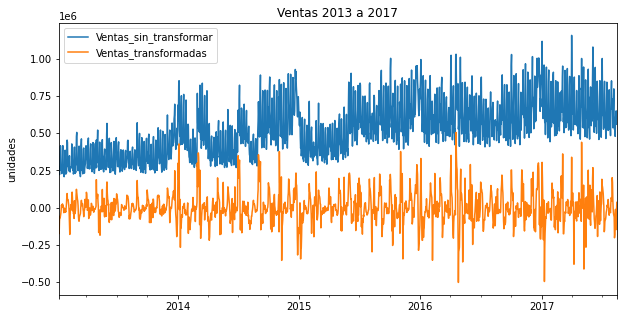

In [31]:
df_merge = pd.merge(pd.DataFrame(df_agg), pd.DataFrame(df_agg1), left_index=True, right_index=True)
# Graficamos df (Sumatoria) con valores sin transformar y el df (sumatoria) con valores tranformados
figura(df_merge,
       'Ventas 2013 a 2017',
       'unidades');

In [32]:
url2 = "https://raw.githubusercontent.com/safranco8/Mentoria2022-G2/main/df_sum.csv"
df_sum = pd.read_csv(url2, index_col=0 ,parse_dates=True)
df_sum

,sales,date.1,Year,Month,Year_month,Weekday,Day,ret_1,ret_2,ret_7,dcoilwtico
date,,,,,,,,,,,
2013-01-01,49807.780010,2013-01-01,2013,1,2013-01,Tuesday,1,NaN,NaN,NaN,93.14
2013-01-02,49807.780010,2013-01-02,2013,1,2013-01,Wednesday,2,49807.780010,NaN,NaN,93.14
2013-01-03,37982.626020,2013-01-03,2013,1,2013-01,Thursday,3,49807.780010,49807.780010,NaN,92.97
2013-01-04,37766.553008,2013-01-04,2013,1,2013-01,Friday,4,37982.626020,49807.780010,NaN,93.12
2013-01-05,44355.684999,2013-01-05,2013,1,2013-01,Saturday,5,37766.553008,37982.626020,NaN,93.20
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,63934.322970,2017-08-11,2017,8,2017-08,Friday,11,52308.346000,68254.368030,70643.221034,48.81
2017-08-12,56080.757022,2017-08-12,2017,8,2017-08,Saturday,12,63934.322970,52308.346000,71393.251000,47.59
2017-08-13,63441.041025,2017-08-13,2017,8,2017-08,Sunday,13,56080.757022,63934.322970,71856.356000,47.59


# Consignas del trabajo práctico N°3

Se proponen las siguientes actividades motivadoras:

A partir de las series transformadas, se proponen actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales. Las actividades no están separadas en secciones para resaltar que no se trata de pasos aislados.

**Se pide:**

* Realizar la división entre datos de entrenamiento y test usando el procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/). Alternativamente se la puede implementar usando [timeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).
* Entrenar al menos un modelo ["baseline"](https://otexts.com/fpp2/simple-methods.html)  (Average Forecast y/o Naive Forecast).
* Identificar cuáles son los parámetros y los hiperparamétros de los modelos SARIMA. 
* Entrenar modelos [SARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html).
* Tunear los hiperparamétros. Puede ser útil la función [auto_arima](https://alkaline-ml.com/pmdarima/auto_examples/arima/example_auto_arima.html#sphx-glr-auto-examples-arima-example-auto-arima-py) de la biblioteca pmdarima.
* Entrenar modelos [LSTM](
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).
* Entrenar modelos [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api). [Otra referencia](https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a).
* Entrenar un modelo de regresión basado en árboles, por ejemplo [XG Boost Regressor](https://towardsdatascience.com/using-gradient-boosting-for-time-series-prediction-tasks-600fac66a5fc).
* Evaluar el desempeño de los modelos usando varias métricas ([Error Cuadrático Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), [Error Absoluto Medio](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error), [Error Absoluto Mediano](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error)). ¿Cómo podemos saber en un problema de regresión si un modelo es "bueno"?¿Se pudo superar a los modelos "baseline"?

**Opcional:**

* Entrenar modelos [SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html). Estos modelos consisten en modelos SARIMA con el agregado de variables exógenas. Tales variables exógenas pueden ser el precio de petróleo o variables dummy como los días de la semana. Muy recomendable!

* Entrenar modelos de [Suavizado Exponencial Estacionales](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Winters-Seasonal).

## Fecha de entrega

__29/07__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


# Respuestas a consignas planteadas

## Train - Test - Validation 

### **Tran test split**

In [33]:
# Division de entrenamiento y prueba para serie agregada (1 única columna)
X = df_agg1.values
train_size = int(len(X) * 0.70)
train0, test0 = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train0)))
print('Testing Observations: %d' % (len(test0)))

Observations: 1681
Training Observations: 1176
Testing Observations: 505


In [34]:
train00=df_agg1[0:1176] 
test00=df_agg1[1176:]
train00.head(3)

,Ventas_transformadas
date,
2013-01-08,-159673.802943
2013-01-09,-175092.728926
2013-01-10,-90861.160061


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


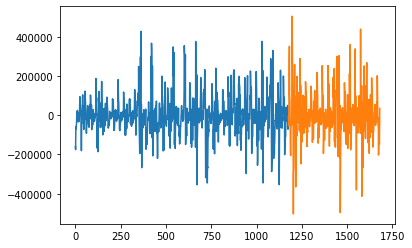

In [35]:
# Grafico de división de serie en entrenamiento y prueba (70/30)
from matplotlib import pyplot
pyplot.plot(train0)
pyplot.rcParams["figure.figsize"] = (12, 8)
pyplot.plot([None for i in train0] + [x for x in test0])
pyplot.show()

### **TimeSeriesSplit**

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Observations: 841
Training Observations: 421
Testing Observations: 420
Observations: 1261
Training Observations: 841
Testing Observations: 420
Observations: 1681
Training Observations: 1261
Testing Observations: 420


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


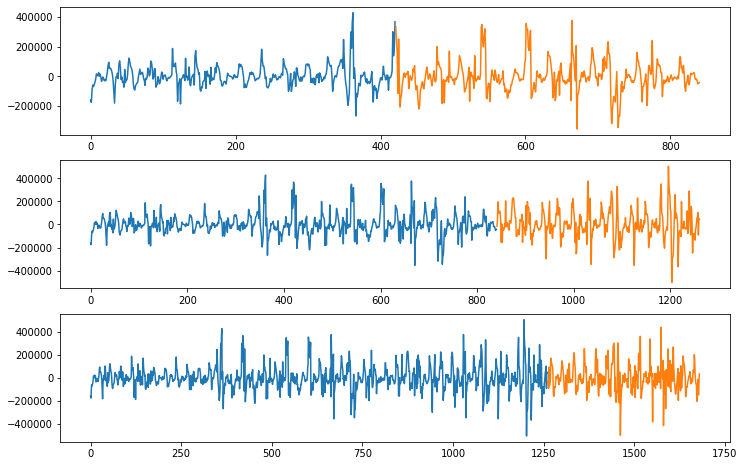

In [36]:
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train1_index, test1_index in splits.split(X):
	train1 = X[train1_index]
	test1 = X[test1_index]
	print('Observations: %d' % (len(train1) + len(test1)))
	print('Training Observations: %d' % (len(train1)))
	print('Testing Observations: %d' % (len(test1)))
	pyplot.subplot(310 + index)
	pyplot.plot(train1)
	pyplot.plot([None for i in train1] + [x for x in test1])
	index += 1
pyplot.show()

### **Walk Forward Validación**

In [37]:
n_train = 1650
n_records = len(X)
for i in range(n_train, n_records):
	train2, test2 = X[0:i], X[i:i+1]
	print('train2=%d, test2=%d' % (len(train2), len(test2)))

train2=1650, test2=1
train2=1651, test2=1
train2=1652, test2=1
train2=1653, test2=1
train2=1654, test2=1
train2=1655, test2=1
train2=1656, test2=1
train2=1657, test2=1
train2=1658, test2=1
train2=1659, test2=1
train2=1660, test2=1
train2=1661, test2=1
train2=1662, test2=1
train2=1663, test2=1
train2=1664, test2=1
train2=1665, test2=1
train2=1666, test2=1
train2=1667, test2=1
train2=1668, test2=1
train2=1669, test2=1
train2=1670, test2=1
train2=1671, test2=1
train2=1672, test2=1
train2=1673, test2=1
train2=1674, test2=1
train2=1675, test2=1
train2=1676, test2=1
train2=1677, test2=1
train2=1678, test2=1
train2=1679, test2=1
train2=1680, test2=1


## **Baseline**

### **Naive Forecast**

El algoritmo de persistencia usa el valor en el paso de tiempo anterior (t-1) para predecir el resultado esperado en el siguiente paso de tiempo (t+1).


"Pronóstico ingenuo"

In [50]:
# Dada la observación en t-1, predecimos la observación en t+1.
values = DataFrame(df_agg1.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1 - original']
print(dataframe.head(5))

               t  t+1 - original
0            NaN  -159673.802943
1 -159673.802943  -175092.728926
2 -175092.728926   -90861.160061
3  -90861.160061   -58541.309990
4  -58541.309990   -68875.900182


In [39]:
# División de entrenamiento y test
Xx = dataframe.values
train_size = int(len(Xx) * 0.7)
train, test = Xx[1:train_size], Xx[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [40]:
# Modelo
def model_persistence(x):
	return x

In [41]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 11889703444.108


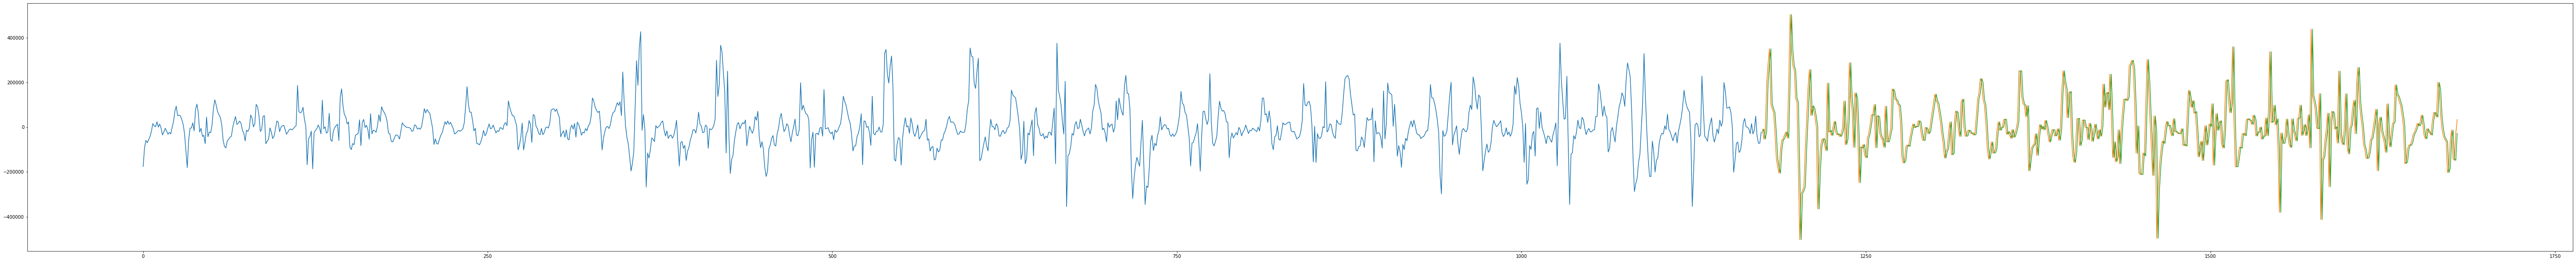

In [47]:
pyplot.plot(train_y)
pyplot.rcParams["figure.figsize"] = (200, 10)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

### **Naive Forecaste** (2)

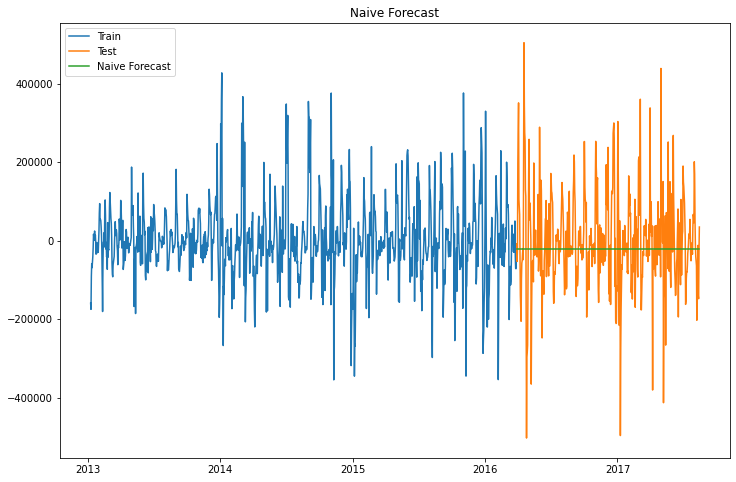

In [45]:
dd= np.asarray(train00.Ventas_transformadas)
y_hat = test00.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train00.index, train00['Ventas_transformadas'], label='Train')
plt.plot(test00.index,test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### **Average Forecast**

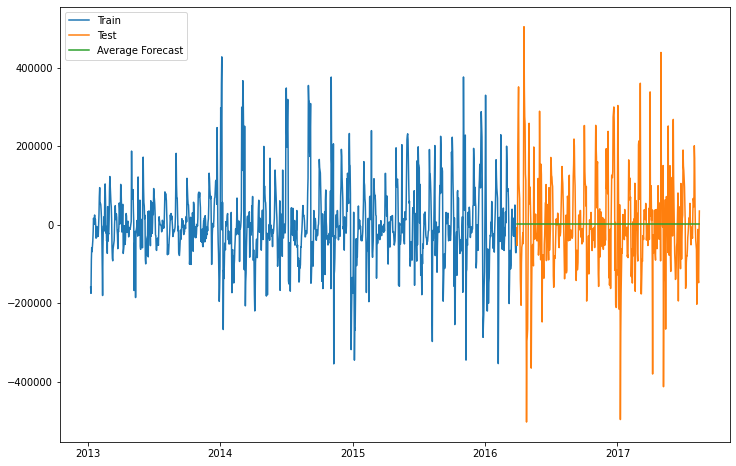

In [46]:
y_hat_avg = test00.copy()
y_hat_avg['avg_forecast'] = train00['Ventas_transformadas'].mean()
plt.figure(figsize=(12,8))
plt.plot(train00['Ventas_transformadas'], label='Train')
plt.plot(test00['Ventas_transformadas'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

## **SARIMA**